In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def get_df(directory_path):
    csv_files_pattern = f'{directory_path}/*.csv'
    csv_files = glob.glob(csv_files_pattern)

    # Initialize a list to store the results
    results = []

    for file in csv_files:
        # Convert csv file to dataframe
        df = pd.read_csv(file)

        # Extract the filename
        filename = file.replace(directory_path, '').replace('.csv', '')

        # Calculate the averages and add them to the list
        results.append({
            'File': filename,
            'Metric': 'Average Depth',
            'Average': df['depth'].mean()
        })
        results.append({
            'File': filename,
            'Metric': 'Average CX Gates',
            'Average': df['cx gates'].mean()
        })
        results.append({
            'File': filename,
            'Metric': 'Average Time',
            'Average': df['time'].mean()
        })

    # Convert the list of results into a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

def plot_graph(results_df):
    # Set the theme for aesthetics
    sns.set_theme(style="whitegrid")

    # Define colors for each metric
    metric_colors = {
        'Average Depth': 'skyblue',
        'Average CX Gates': 'lightgreen',
        'Average Time': 'salmon'
    }

    # Separate plots for each metric
    metrics = results_df['Metric'].unique()
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Average", y="File", data=results_df[results_df['Metric'] == metric], color=metric_colors[metric], errorbar=None)
        plt.title(f'{metric} per File')
        plt.xlabel('Average Value')
        plt.ylabel('File')
        plt.tight_layout()
        plt.show()


# GHZ

Metric,Average CX Gates,Average Depth,Average Time
File,,,
sabre_v0_20_,1034.857143,555.658730,0.084558
sabre_v0_20_depth,1086.428571,184.222222,0.095485
sabre_v0_20_extended,714.571429,273.960317,0.087270


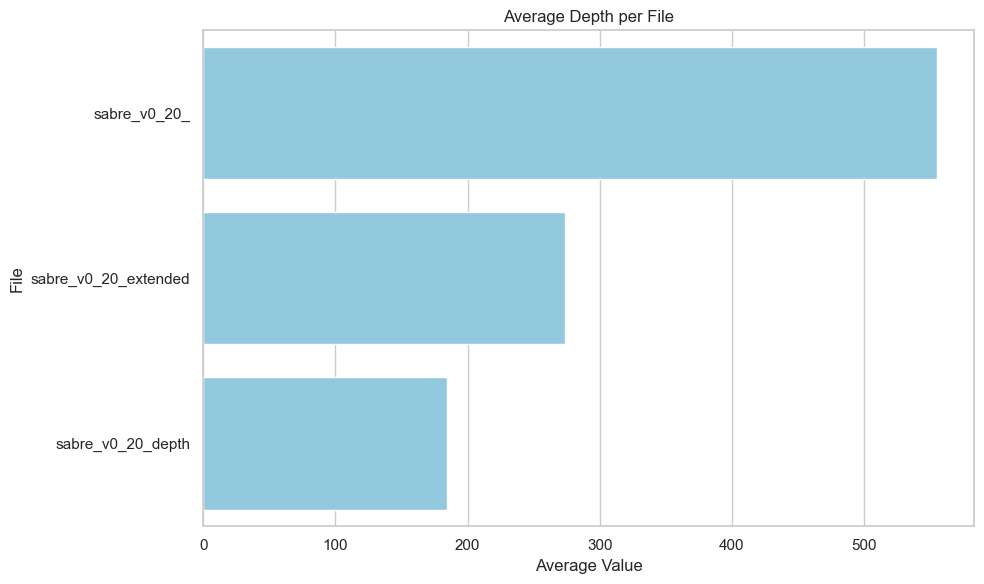

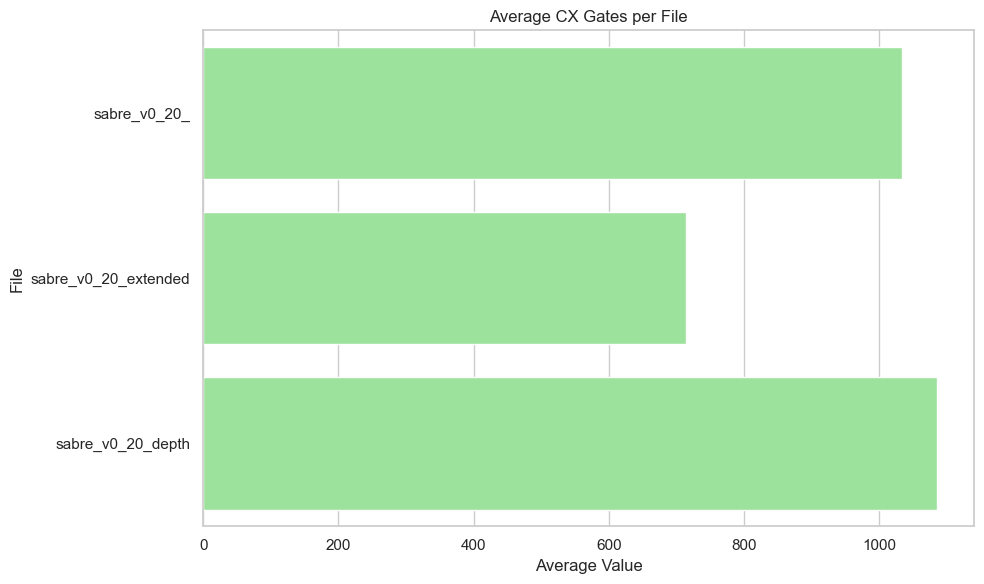

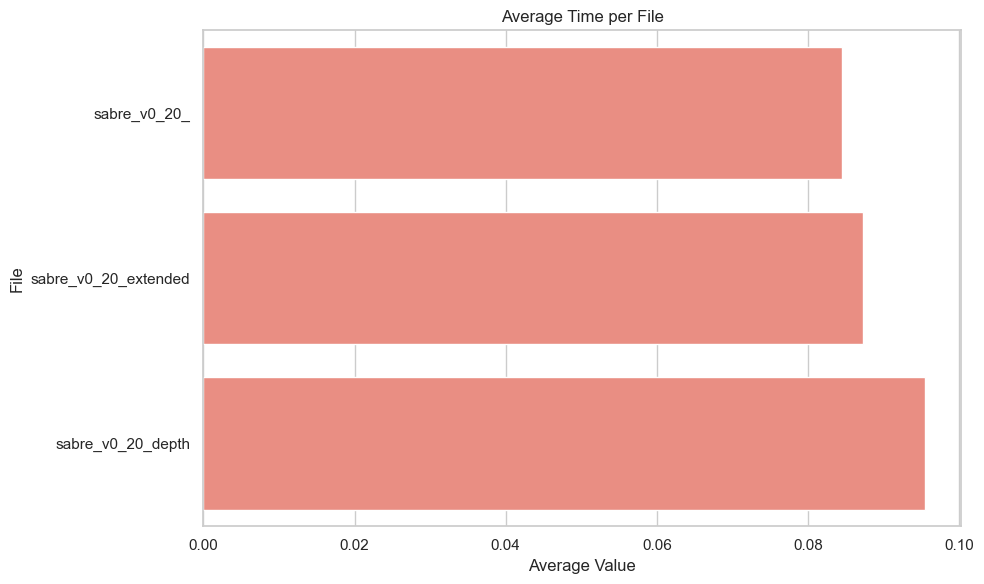

None

In [4]:
directory_path = 'ghz/'
results_df = get_df(directory_path)
# look over results as a table, by the metric
display(results_df.pivot(index='File', columns='Metric', values='Average'))
display(plot_graph(results_df))

# Red Queen

Metric,Average CX Gates,Average Depth,Average Time
File,,,
sabre_v0_20_,308.989899,141.353535,0.086134
sabre_v0_20_depth,316.171717,97.979798,0.105422
sabre_v0_20_extended,248.020202,135.363636,0.092857


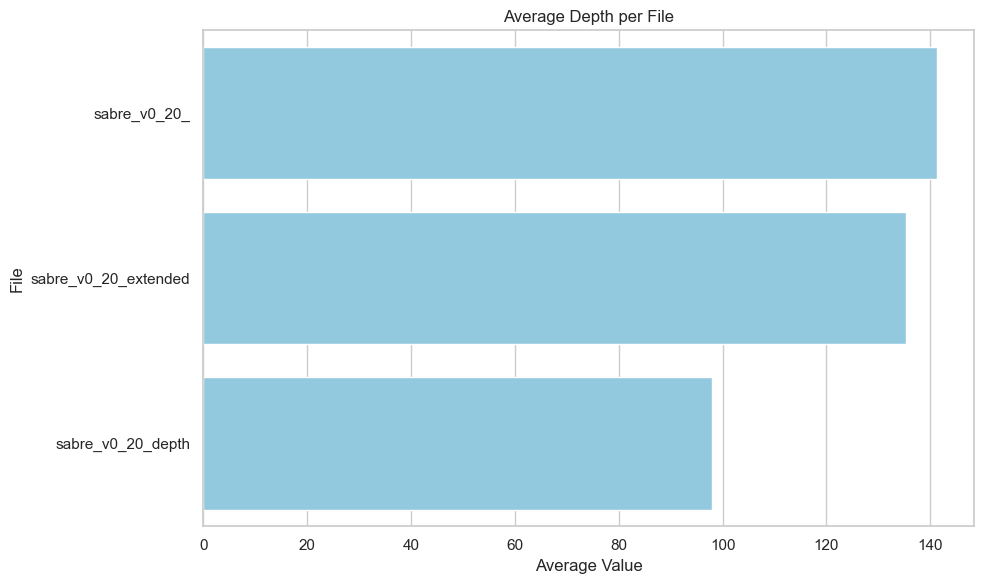

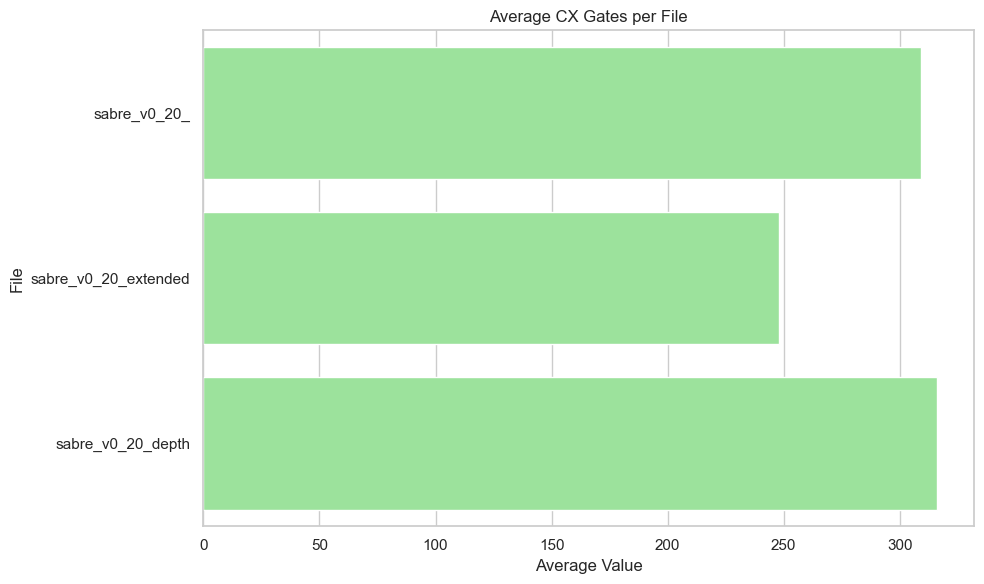

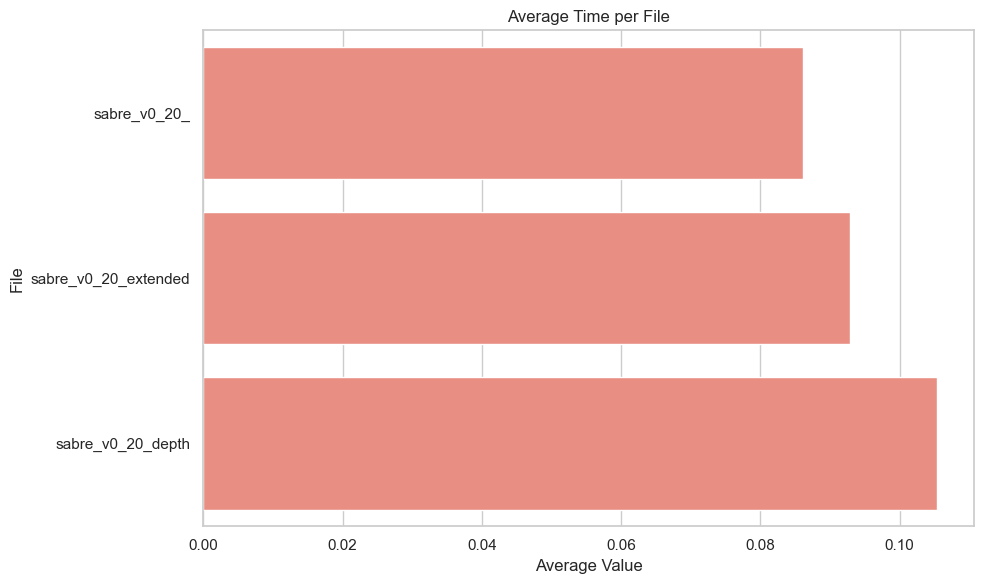

None

In [5]:
directory_path = 'red_queen/'
results_df = get_df(directory_path)
# look over results as a table, by the metric
display(results_df.pivot(index='File', columns='Metric', values='Average'))
display(plot_graph(results_df))

# Red queen All

Metric,Average CX Gates,Average Depth,Average Time
File,,,
sabre_v0_20_,1204.972727,633.718182,0.214332
sabre_v0_20_depth,1386.854545,667.909091,0.540212
sabre_v0_20_extended,1082.436364,617.463636,0.206535


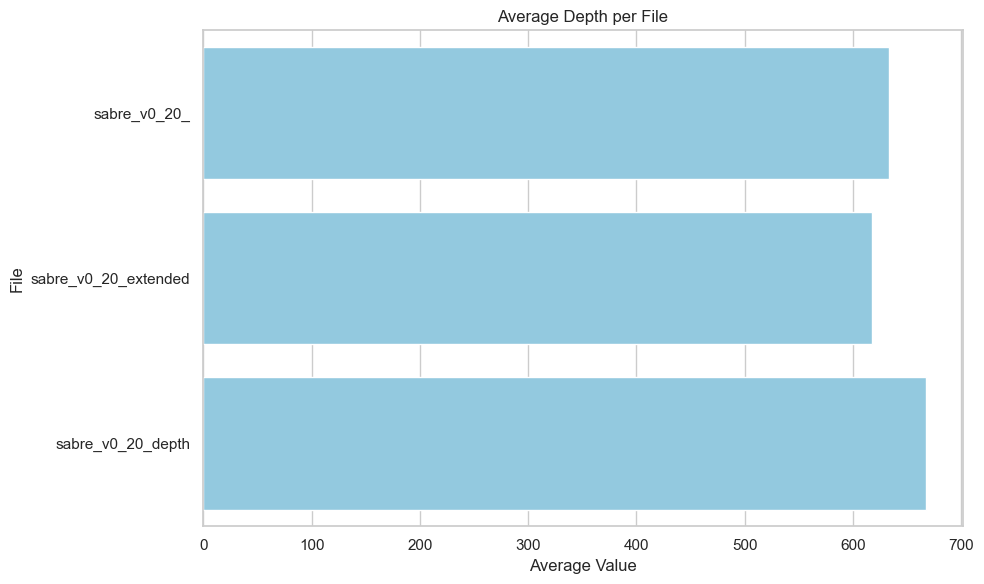

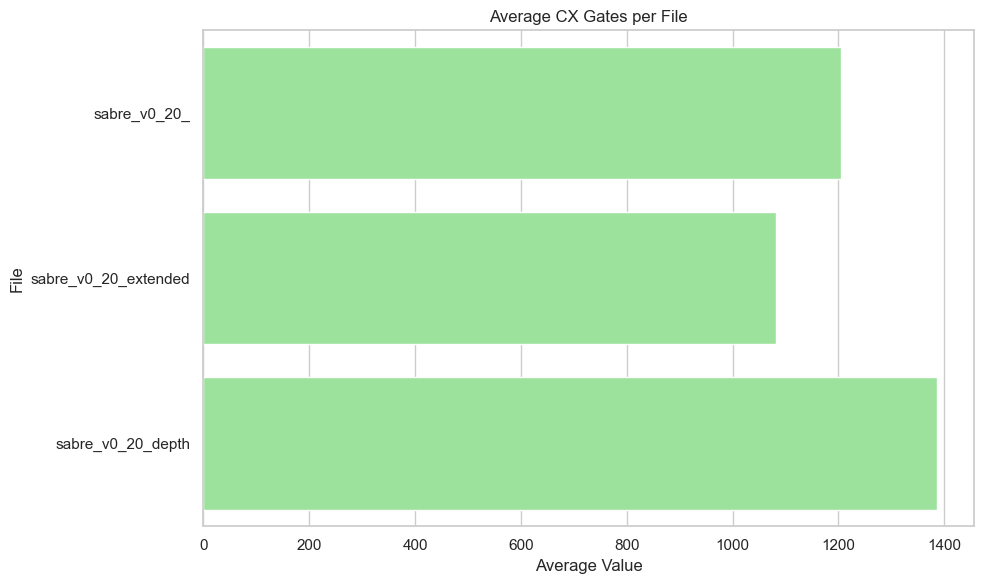

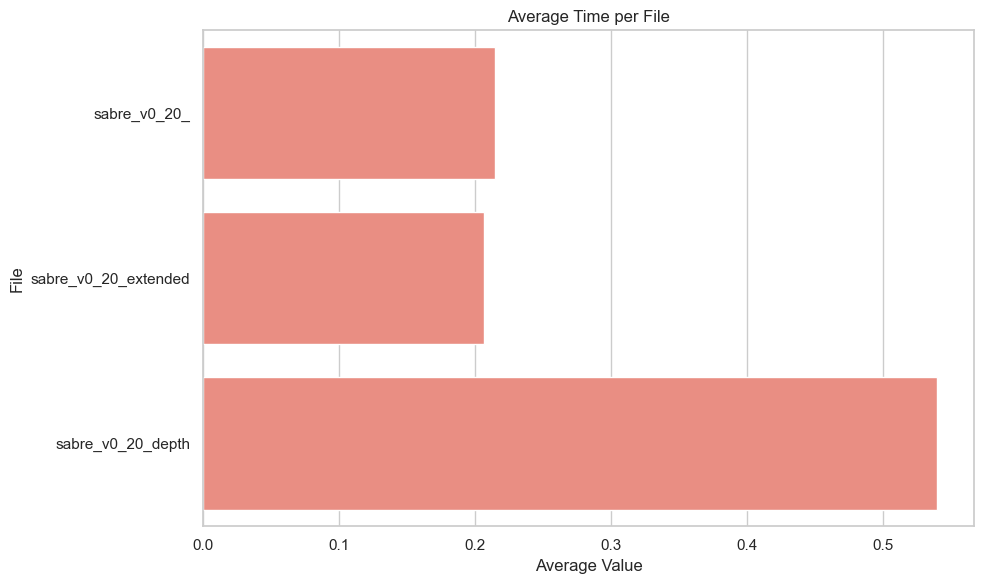

None

In [6]:
directory_path = 'red_queen_all/'
results_df = get_df(directory_path)
# look over results as a table, by the metric
display(results_df.pivot(index='File', columns='Metric', values='Average'))
display(plot_graph(results_df))